In [74]:
import tensorflow as tf
import numpy as np

In [2]:
from read_dataset import generator
import os

In [3]:
tr_path = os.getcwd() + "\\..\\data\\sample_data\\train\\"

In [4]:
tr_path

'G:\\My Drive\\CLASSES\\WI21\\Project\\RouteNet-challenge2\\RouteNet-challenge\\code\\..\\data\\sample_data\\train\\'

In [20]:
from datanetAPI import DatanetAPI
#https://github.com/knowledgedefinednetworking/datanetAPI/tree/challenge2020
import networkx as nx

tool = DatanetAPI(tr_path)
it = iter(tool)
for sample in it:
    break

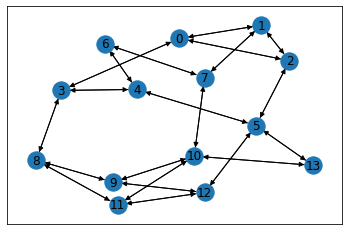

In [111]:
network = sample.topology_object
nx.draw_networkx(network)

In [95]:
network.edges, len(network.edges)

(OutMultiEdgeView([(0, 1, 0), (0, 3, 0), (0, 2, 0), (1, 0, 0), (1, 2, 0), (1, 7, 0), (2, 0, 0), (2, 1, 0), (2, 5, 0), (3, 0, 0), (3, 4, 0), (3, 8, 0), (4, 3, 0), (4, 5, 0), (4, 6, 0), (5, 2, 0), (5, 4, 0), (5, 12, 0), (5, 13, 0), (6, 4, 0), (6, 7, 0), (7, 1, 0), (7, 6, 0), (7, 10, 0), (8, 3, 0), (8, 9, 0), (8, 11, 0), (9, 8, 0), (9, 10, 0), (9, 12, 0), (10, 7, 0), (10, 9, 0), (10, 11, 0), (10, 13, 0), (11, 8, 0), (11, 10, 0), (11, 12, 0), (12, 5, 0), (12, 9, 0), (12, 11, 0), (13, 5, 0), (13, 10, 0)]),
 42)

In [41]:
i = 0
for edge in network.edges:
    print(network.edges[edge[0],edge[1],edge[2]])
    i+=1
    if i == 10:
        break

{'port': 0, 'weight': 1, 'bandwidth': 10000}
{'port': 1, 'weight': 1, 'bandwidth': 10000}
{'port': 2, 'weight': 1, 'bandwidth': 10000}
{'port': 0, 'weight': 1, 'bandwidth': 10000}
{'port': 1, 'weight': 1, 'bandwidth': 10000}
{'port': 2, 'weight': 1, 'bandwidth': 10000}
{'port': 0, 'weight': 1, 'bandwidth': 10000}
{'port': 1, 'weight': 1, 'bandwidth': 10000}
{'port': 2, 'weight': 1, 'bandwidth': 25000}
{'port': 0, 'weight': 1, 'bandwidth': 10000}


In [69]:
network.nodes[0]

{'levelsQoS': 3,
 'schedulingPolicy': 'WFQ',
 'schedulingWeights': '60,30,10',
 'queueSizes': '32,32,32'}

In [70]:
network[0][1]

AtlasView({0: {'port': 0, 'weight': 1, 'bandwidth': 10000}})

In [71]:
# routing matrix tells you the path that needs to be taken for every source-dest node pair

print(sample.get_routing_matrix()[0])
print(sample.get_routing_matrix()[1])
print(sample.get_routing_matrix().shape)


[list([0]) list([0, 1]) list([0, 2]) list([0, 3]) list([0, 3, 4])
 list([0, 2, 5]) list([0, 3, 4, 6]) list([0, 1, 7]) list([0, 3, 8])
 list([0, 3, 8, 9]) list([0, 1, 7, 10]) list([0, 3, 8, 11])
 list([0, 2, 5, 12]) list([0, 2, 5, 13])]
[list([1, 0]) list([1]) list([1, 2]) list([1, 0, 3]) list([1, 0, 3, 4])
 list([1, 2, 5]) list([1, 7, 6]) list([1, 7]) list([1, 0, 3, 8])
 list([1, 7, 10, 9]) list([1, 7, 10]) list([1, 7, 10, 11])
 list([1, 2, 5, 12]) list([1, 7, 10, 13])]
(14, 14)


In [107]:
routing = sample.get_routing_matrix()
paths = routing[~np.eye(routing.shape[0], dtype=bool)].reshape(routing.shape[0], -1)
print(routing.shape, paths.shape)
paths = paths.flatten()
print(paths.shape, paths[:2],paths[98])

(14, 14) (14, 13)
(182,) [list([0, 1]) list([0, 2])] [7, 10, 9, 8]


In [149]:
cap_mat = np.full((network.number_of_nodes(), network.number_of_nodes()), fill_value=None)
for node in range(network.number_of_nodes()):
    for adj in network[node]:
        cap_mat[node, adj] = network[node][adj][0]['bandwidth']

print(cap_mat)
# take the indexes of where there is capacity and turn into a list
links = np.where(np.ravel(cap_mat) != None)[0].tolist()
link_capacities = (np.ravel(cap_mat)[links]).tolist()
len(links),len(link_capacities),links[:10],link_capacities[:10]

[[None 10000 10000 10000 None None None None None None None None None
  None]
 [10000 None 10000 None None None None 10000 None None None None None
  None]
 [10000 10000 None None None 25000 None None None None None None None
  None]
 [10000 None None None 25000 None None None 25000 None None None None
  None]
 [None None None 25000 None 25000 10000 None None None None None None
  None]
 [None None 25000 None 25000 None None None None None None None 10000
  10000]
 [None None None None 10000 None None 10000 None None None None None None]
 [None 10000 None None None None 10000 None None None 25000 None None
  None]
 [None None None 25000 None None None None None 10000 None 10000 None
  None]
 [None None None None None None None None 10000 None 10000 None 10000
  None]
 [None None None None None None None 25000 None 10000 None 10000 None
  10000]
 [None None None None None None None None 10000 None 10000 None 10000
  None]
 [None None None None None 10000 None None None 10000 None 10000 

(42,
 42,
 [1, 2, 3, 14, 16, 21, 28, 29, 33, 42],
 [10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 25000, 10000])

In [100]:

nodes = len(routing)
ids = list(range(len(links)))

links_id = dict(zip(links, ids))
path_ids = []
for path in paths:                    # 182 lists of node sequences (src-> int -> .... -> dest)
    new_path = [] 
    for i in range(0, len(path) - 1): # number of nodes in the specific src,dest path... minus 1
        src = path[i]                 # break path into series of single hops (src,int1) (int1,int2) (int2,dst)
        dst = path[i + 1]
        new_path.append(links_id[src * nodes + dst])     # grabs the id of the link between each single hop (src,dest)
    path_ids.append(new_path)                            # aggregates a list of links used in all paths, links can be
                                                         # used more than once

In [110]:
# convert paths from path described by nodes and turn into paths defined by links
len(path_ids),path_ids[98],paths[98]

(182, [23, 31, 27], [7, 10, 9, 8], ((7, 0), (10, 9), (9, 8)))

In [129]:
path_ids[:4]

[[0], [1], [2], [2, 10]]

In [115]:
link_indices = []
path_indices = []
sequ_indices = []
segment = 0                                         
for p in path_ids:
    link_indices += p
    path_indices += len(p) * [segment]
    sequ_indices += list(range(len(p)))
    segment += 1

In [148]:
# take path list and flatten into single individual list
# list of all links used in all paths, list of which path each link belongs to, which number each link is as part of its path
link_indices[:5],path_indices[:5],sequ_indices[:5]

([0, 1, 2, 2, 10], 390, [0, 1, 2, 3, 3], [0, 0, 0, 0, 1])

In [150]:
len(link_indices),len(path_indices),len(sequ_indices)

(390, 390, 390)

In [146]:
traffic = sample.get_traffic_matrix()
traffic = traffic[~np.eye(traffic.shape[0], dtype=bool)].reshape(traffic.shape[0], -1)
traffic.shape
traffic[0,0]

{'AggInfo': {'AvgBw': 350.733,
  'PktsGen': 0.353085,
  'TotalPktsGen': 10927.980749999999},
 'Flows': [{'TimeDist': <TimeDist.EXPONENTIAL_T: 0>,
   'TimeDistParams': {'EqLambda': 354.408,
    'AvgPktsLambda': 0.354408,
    'ExpMaxFactor': 10.0},
   'SizeDist': <SizeDist.BINOMIAL_S: 2>,
   'SizeDistParams': {'AvgPktSize': 1000.0,
    'PktSize1': 300.0,
    'PktSize2': 1700.0},
   'AvgBw': 350.733,
   'PktsGen': 0.353085,
   'TotalPktsGen': 10927.980749999999,
   'ToS': 2.0}]}

In [147]:
result = sample.get_performance_matrix()
result = result[~np.eye(result.shape[0], dtype=bool)].reshape(result.shape[0], -1)
print(result.shape)

sample.get_performance_matrix()[0,1]

(14, 13)


{'AggInfo': {'PktsDrop': 0.0,
  'AvgDelay': 0.112495,
  'AvgLnDelay': -2.52386,
  'p10': 0.03,
  'p20': 0.03,
  'p50': 0.169999,
  'p80': 0.169999,
  'p90': 0.169999,
  'Jitter': 0.006385},
 'Flows': [{'PktsDrop': 0.0,
   'AvgDelay': 0.112495,
   'AvgLnDelay': -2.52386,
   'p10': 0.03,
   'p20': 0.03,
   'p50': 0.169999,
   'p80': 0.169999,
   'p90': 0.169999,
   'Jitter': 0.006385}]}

In [154]:
avg_bw = []
pkts_gen = []
delay = []
########## critical information here #############
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        flow = traffic[i, j]['Flows'][0]
        avg_bw.append(flow['AvgBw'])
        pkts_gen.append(flow['PktsGen'])
        d = result[i, j]['AggInfo']['AvgDelay']
        delay.append(d)

n_paths = len(path_ids)
n_links = max(max(path_ids)) + 1

In [155]:
n_paths = len(path_ids)
n_links = max(max(path_ids)) + 1
n_links,n_paths

(42, 182)

In [157]:
len(avg_bw)

182

In [5]:
for batch, delay in generator(tr_path):
    x = batch
    y = delay
    break

[[None 10000 10000 10000 None None None None None None None None None
  None]
 [10000 None 10000 None None None None 10000 None None None None None
  None]
 [10000 10000 None None None 25000 None None None None None None None
  None]
 [10000 None None None 25000 None None None 25000 None None None None
  None]
 [None None None 25000 None 25000 10000 None None None None None None
  None]
 [None None 25000 None 25000 None None None None None None None 10000
  10000]
 [None None None None 10000 None None 10000 None None None None None None]
 [None 10000 None None None None 10000 None None None 25000 None None
  None]
 [None None None 25000 None None None None None 10000 None 10000 None
  None]
 [None None None None None None None None 10000 None 10000 None 10000
  None]
 [None None None None None None None 25000 None 10000 None 10000 None
  10000]
 [None None None None None None None None 10000 None 10000 None 10000
  None]
 [None None None None None 10000 None None None 10000 None 10000 

In [7]:
# in this sample the capacity matrix is 14 x 14 and they remove the entries along the diagonal and then they flatten it

182

In [8]:
x.keys()

dict_keys(['bandwith', 'packets', 'link_capacity', 'links', 'paths', 'sequences', 'n_links', 'n_paths'])

In [13]:
type(x['bandwith']),len(x['bandwith']),x['bandwith'][:10]

(list,
 182,
 [350.733,
  111.101,
  258.2,
  493.234,
  588.1260000000001,
  372.817,
  240.12900000000002,
  258.277,
  147.78900000000002,
  108.129])

In [14]:
type(x['packets']),len(x['packets']),x['packets'][:10]

(list,
 182,
 [0.353085,
  0.111599,
  0.257996,
  0.493957,
  0.583489,
  0.374378,
  0.241486,
  0.256445,
  0.148852,
  0.108174])

In [15]:
type(x['link_capacity']),len(x['link_capacity']),x['link_capacity'][:10]

(list,
 42,
 [10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 25000, 10000])

In [68]:
type(x['links']),len(x['links']),x['links'][:10]

(list, 390, [0, 1, 2, 2, 10, 1, 8, 2, 10, 14])

In [37]:
x['n_paths'],len(x['paths'])

(182, 390)

In [72]:
len(y),y[:10]

(182,
 [0.112495,
  0.117688,
  0.130481,
  0.177744,
  0.165814,
  0.323846,
  0.238618,
  0.194655,
  0.301718,
  0.288165])